In [19]:
import pandas as pd
import windrose as wr
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [20]:
df = pd.read_pickle('../Dataframes/df_wind_gbg.pkl')

In [21]:
df

,Datum,Tid_UTC,Vindriktning,Kvalitet,Vindhastighet,Kvalitet_1,Year,Month,Snitt_per_dag,Max_uppmätta_hastighet
0,1961-01-01,06:00:00,180.0,G,0.0,G,1961,1,2.33,4.0
1,1961-01-01,12:00:00,180.0,G,4.0,G,1961,1,2.33,4.0
2,1961-01-01,18:00:00,140.0,G,3.0,G,1961,1,2.33,4.0
3,1961-01-02,06:00:00,180.0,G,4.0,G,1961,1,5.00,6.0
4,1961-01-02,12:00:00,180.0,G,5.0,G,1961,1,5.00,6.0
...,...,...,...,...,...,...,...,...,...,...
305146,2023-07-01,02:00:00,249.0,G,3.1,G,2023,7,2.47,3.5
305147,2023-07-01,03:00:00,226.0,G,2.2,G,2023,7,2.47,3.5
305148,2023-07-01,04:00:00,223.0,G,2.3,G,2023,7,2.47,3.5
305149,2023-07-01,05:00:00,217.0,G,1.9,G,2023,7,2.47,3.5


In [22]:
# Which year is the midpointof the dataset?
midpoint = (df['Year'][-1:].values[0] - df['Year'][1]) / 2
midpoint_year = df['Year'][-1:].values[0] - midpoint 
midpoint_year

1992.0

In [23]:
df_pre_1992 = df[df['Year'] < 1992]
df_post_1992 = df[df['Year'] >= 1992]

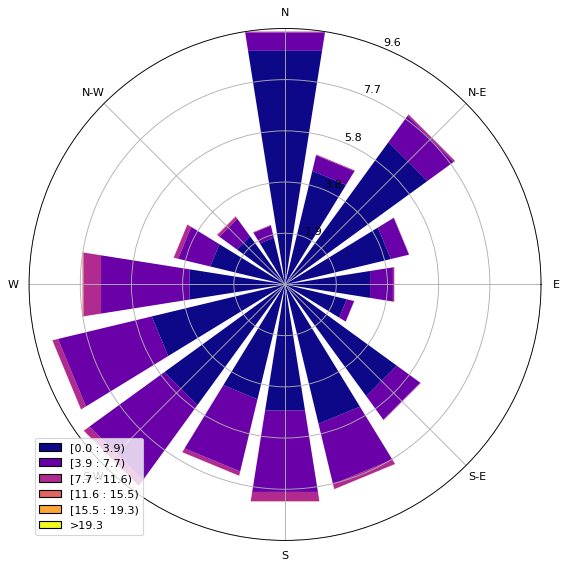

In [24]:

ax = wr.WindroseAxes.from_ax()
ax.bar(df['Vindriktning'], df['Snitt_per_dag'], normed=True, cmap=cm.plasma)
ax.legend()
plt.show()

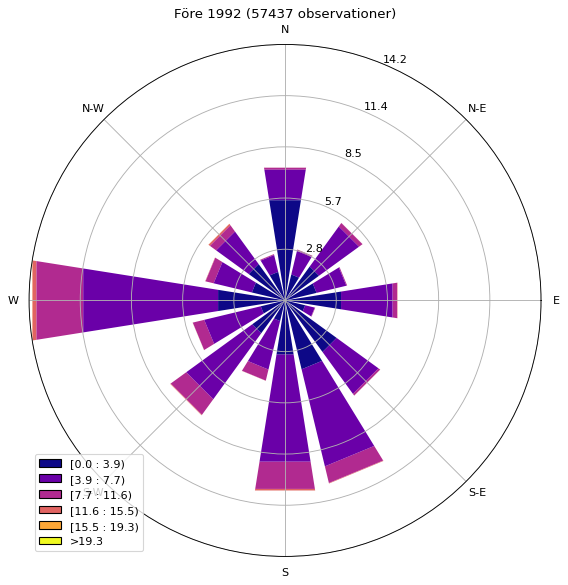

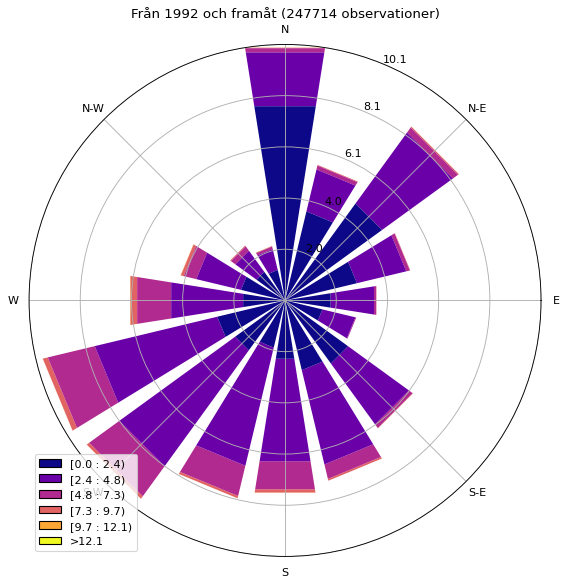

In [28]:
ax = wr.WindroseAxes.from_ax()
ax.bar(df_pre_1992['Vindriktning'], df_pre_1992['Snitt_per_dag'], normed=True, cmap=cm.plasma)
plt.title(f'Före 1992 ({len(df_pre_1992)} observationer)')
ax.legend()
plt.show()

ax = wr.WindroseAxes.from_ax()
ax.bar(df_post_1992['Vindriktning'], df_post_1992['Snitt_per_dag'], normed=True, cmap=cm.plasma)
plt.title(f'Från 1992 och framåt ({len(df_post_1992)} observationer)')
ax.legend()
plt.show()

# Vindarna verkar ha ökat från norr, och minskat från Väster
# Kolla om detta stämmer med plottarna i wind_data_direction_change_over_time